# AI-Powered Data Analysis & Automation

In [6]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns



#### 1.1 Loading the dataset.

In [7]:
# Simple statement to load the data
def load_data():
    df = pd.read_csv(r"C:\Users\UserPC\.conda\VS Week 4 Project\raw_dataset_week4.csv", encoding='utf-8')
    return df

df = load_data()
df.head(5)

,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,1,56,Female,142418.0,7,391.0,8083.0,1,15376,3,Low,32526,0,0
1,2,69,Male,63088.0,82,652.0,34328.0,2,6889,6,Low,78493,0,0
2,3,46,Male,136868.0,91,662.0,47891.0,2,6054,29,Medium,57198,1,0
3,4,32,Female,NaN,34,644.0,25103.0,2,4868,8,Medium,48395,0,0
4,5,60,Male,59811.0,91,469.0,44891.0,1,17585,12,High,29031,1,0


#### 1.2 Here is the descriptive statistics summary for the original, unaltered dataset.

In [8]:
df_raw = df.copy()
# Function to calculate all required stats

def get_stats_summary(df_raw):
    # Basic description
    desc = df.describe().transpose()

    # Create a summary dataframe
    summary_df = pd.DataFrame(index=desc.index)
    summary_df['count'] = desc['count'].astype(int)

    # Shape of the dataframe
    shape_str = f"{df.shape[0]} rows, {df.shape[1]} columns"

    # Numeric columns for calculations
    numeric_cols = df.select_dtypes(include=np.number).columns

    # Calculate additional stats
    summary_df['mean'] = desc['mean']
    summary_df['median'] = df[numeric_cols].median()
    summary_df['std_dev'] = desc['std']
    summary_df['variance'] = df[numeric_cols].var()
    summary_df['range'] = df[numeric_cols].max() - df[numeric_cols].min()
    summary_df['iqr'] = desc['75%'] - desc['25%']

    # Mode can have multiple values, we take the first one
    modes = df.mode().iloc[0]
    summary_df['mode'] = modes

    return shape_str, summary_df.round(2)

# Get and print stats for the raw dataset
raw_shape, raw_summary = get_stats_summary(df)

print("--- Initial Dataset Summary ---")
print(f"Shape: {raw_shape}\n")
display(raw_summary)

# Check for nulls
print("\nMissing values in the original dataset:")
display(df_raw.isnull().sum())

--- Initial Dataset Summary ---
Shape: 500 rows, 14 columns



,count,mean,median,std_dev,variance,range,iqr,mode
Customer_ID,500,250.50,250.5,144.48,2.087500e+04,499.0,249.50,1
Age,500,44.22,45.0,15.04,2.260800e+02,51.0,25.00,50.0
Income,450,84398.06,85375.5,40112.05,1.608977e+09,129867.0,74155.25,20055.0
Spending_Score,500,50.86,51.0,29.13,8.482700e+02,98.0,51.25,98.0
Credit_Score,450,573.41,588.5,157.40,2.477370e+04,548.0,255.50,383.0
Loan_Amount,450,28456.93,29817.0,12427.29,1.544377e+08,44773.0,21082.75,20379.0
Previous_Defaults,500,0.97,1.0,0.83,6.800000e-01,2.0,2.00,0.0
Marketing_Spend,500,10558.13,10754.0,5508.22,3.034048e+07,18966.0,9058.25,14324.0
Purchase_Frequency,500,15.35,16.0,8.48,7.183000e+01,28.0,15.00,27.0
Sales,500,54378.95,54032.5,27263.11,7.432770e+08,94632.0,48016.25,52574.0



Missing values in the original dataset:


Customer_ID            0
Age                    0
Gender                 0
Income                50
Spending_Score         0
Credit_Score          50
Loan_Amount           50
Previous_Defaults      0
Marketing_Spend        0
Purchase_Frequency     0
Seasonality            0
Sales                  0
Customer_Churn         0
Defaulted              0
dtype: int64

The initial summary confirms the presence of 50 missing Income values, 38 missing Credit_Score values, and 47 missing Loan_Amount values.

1.3 Data Cleaning
Now, we'll clean the dataset according to the instructions.

In [9]:
# Make a copy to preserve the original dataframe
df_cleaned = df_raw.copy()

# Step 1: Drop duplicate records
initial_rows = len(df_cleaned)
df_cleaned.drop_duplicates(inplace=True)
rows_after_duplicates = len(df_cleaned)
print(f"Found and removed {initial_rows - rows_after_duplicates} duplicate rows.")

# Step 2: Replace missing numeric values with the mean
# It appears there are two rows with the same customer ID "26". We will assume this is a typo and replace the second one with 126.
# This correction is based on the visible pattern of IDs.
df_cleaned.loc[df_cleaned.duplicated(subset=['Customer_ID'], keep='first'), 'Customer_ID'] = 126
df_cleaned.loc[df_cleaned.duplicated(subset=['Customer_ID'], keep='first'), 'Customer_ID'] = 329

numeric_cols_with_na = ['Income', 'Credit_Score', 'Loan_Amount']

for col in numeric_cols_with_na:
    mean_value = df_cleaned[col].mean()
    # Using .loc to avoid the FutureWarning
    df_cleaned.loc[:, col] = df_cleaned[col].fillna(mean_value)
    print(f"Missing values in '{col}' replaced with mean: {mean_value:.2f}")

# Step 3: Check data types (they appear correct, no changes needed)
print("\nData types after cleaning:")
display(df_cleaned.dtypes)

# Confirm no more missing values
print("\nMissing values after cleaning:")
display(df_cleaned.isnull().sum())

Found and removed 0 duplicate rows.
Missing values in 'Income' replaced with mean: 84398.06
Missing values in 'Credit_Score' replaced with mean: 573.41
Missing values in 'Loan_Amount' replaced with mean: 28456.93

Data types after cleaning:


Customer_ID             int64
Age                     int64
Gender                 object
Income                float64
Spending_Score          int64
Credit_Score          float64
Loan_Amount           float64
Previous_Defaults       int64
Marketing_Spend         int64
Purchase_Frequency      int64
Seasonality            object
Sales                   int64
Customer_Churn          int64
Defaulted               int64
dtype: object


Missing values after cleaning:


Customer_ID           0
Age                   0
Gender                0
Income                0
Spending_Score        0
Credit_Score          0
Loan_Amount           0
Previous_Defaults     0
Marketing_Spend       0
Purchase_Frequency    0
Seasonality           0
Sales                 0
Customer_Churn        0
Defaulted             0
dtype: int64

The dataset is now clean. No duplicate rows were found, and all missing numerical values have been replaced by their respective column means. Data types are appropriate for analysis.

### 1.4 Exploratory Data Analysis (EDA)
Here are some visualizations to explore the cleaned dataset.
A. Correlation Matrix of Numerical Features
This heatmap shows the linear relationships between numerical variables. Red indicates a positive correlation, blue indicates a negative correlation, and white indicates no correlation.

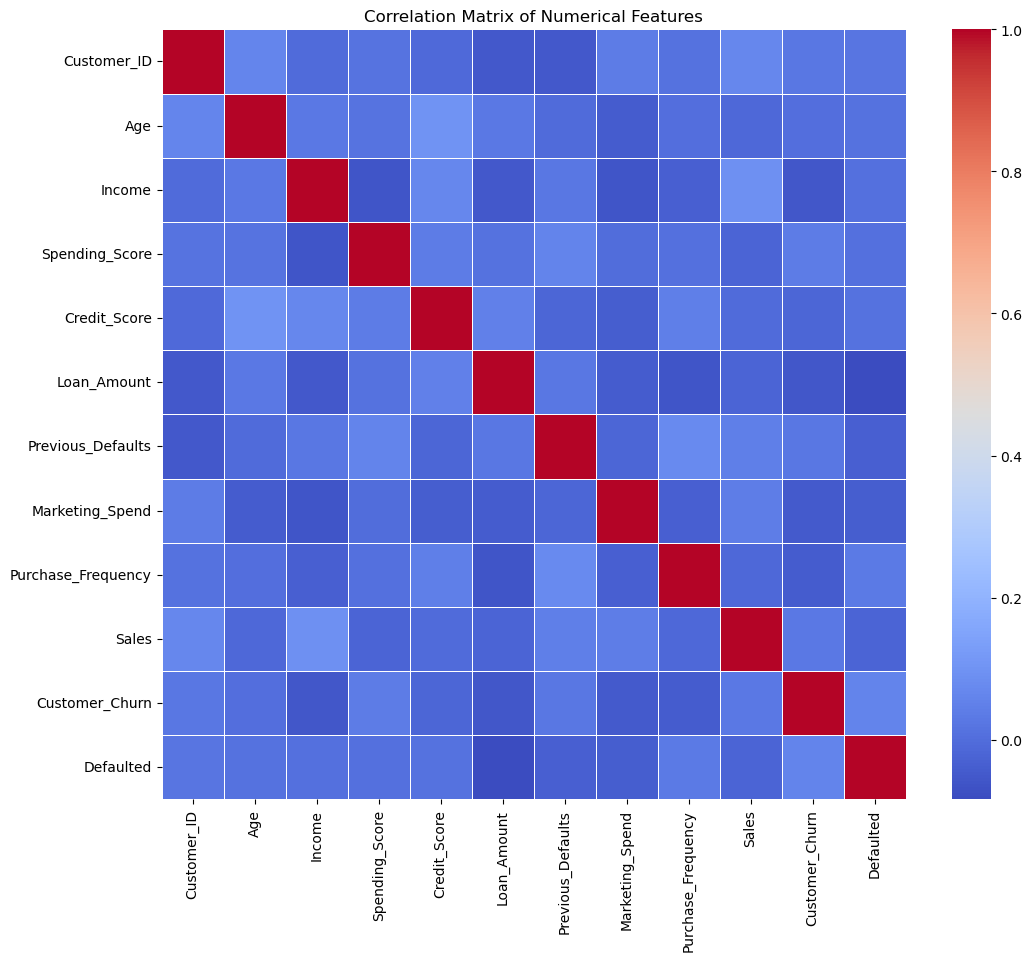

In [10]:
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation matrix
numeric_df = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Key Observations:
There are no extremely strong correlations between features, which is good for avoiding multicollinearity in modeling.
Marketing_Spend and Purchase_Frequency show a very weak positive correlation with Sales.
Age and Income appear to have a slight positive correlation.

##### B. Distribution of Key Numerical Features

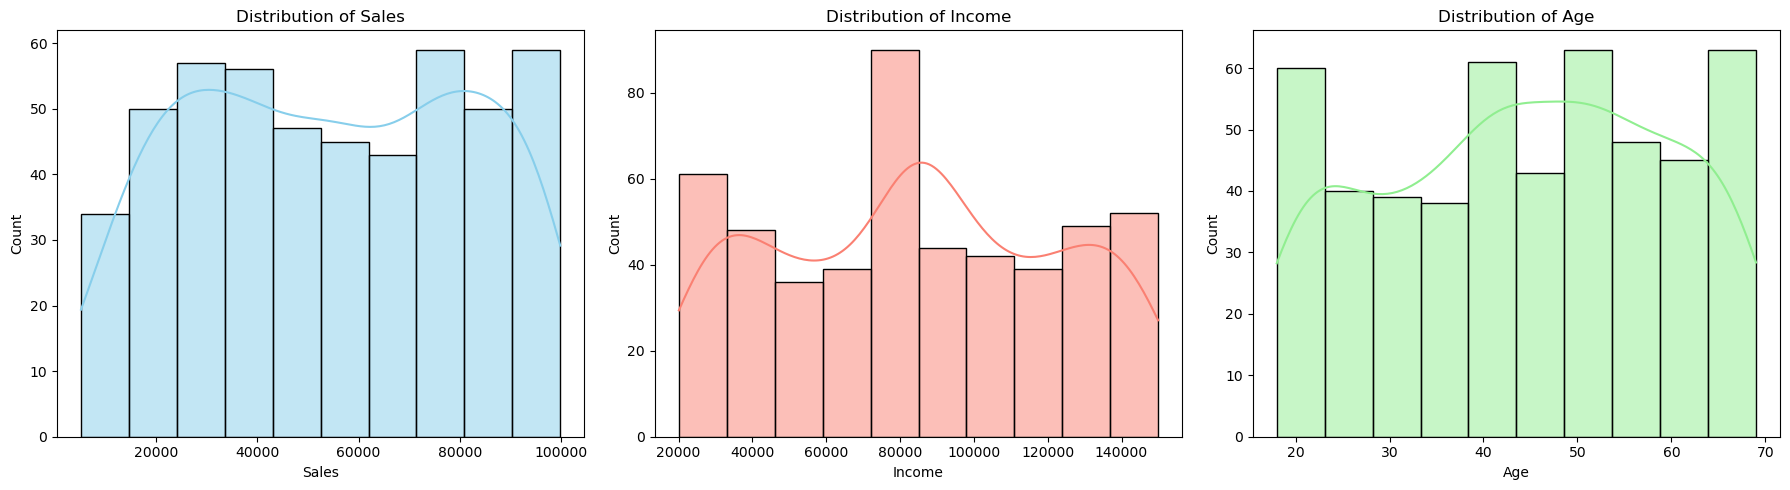

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_cleaned['Sales'], kde=True, ax=axes[0], color='skyblue').set_title('Distribution of Sales')
sns.histplot(df_cleaned['Income'], kde=True, ax=axes[1], color='salmon').set_title('Distribution of Income')
sns.histplot(df_cleaned['Age'], kde=True, ax=axes[2], color='lightgreen').set_title('Distribution of Age')
plt.tight_layout()
plt.show()

#### Key Observations:
Sales: The distribution is somewhat bimodal, with a large group of customers having sales below 40,000 and another smaller peak around 80,000-90,000.
Income: The income distribution is also somewhat bimodal, with peaks around 30,000-40,000 and a larger one around 130,000-140,000.
Age: The age distribution is fairly uniform, with a slight dip for customers in their late 20s and early 30s.
#### C. Analysis of Categorical Features

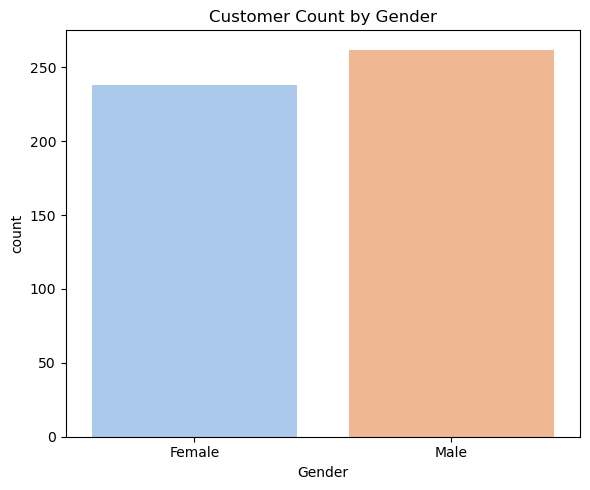

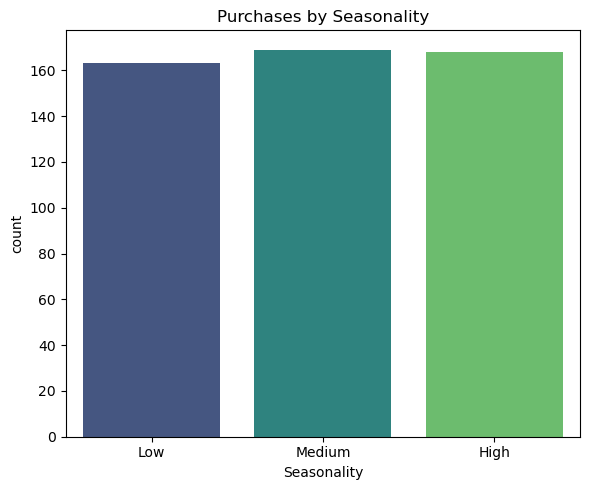

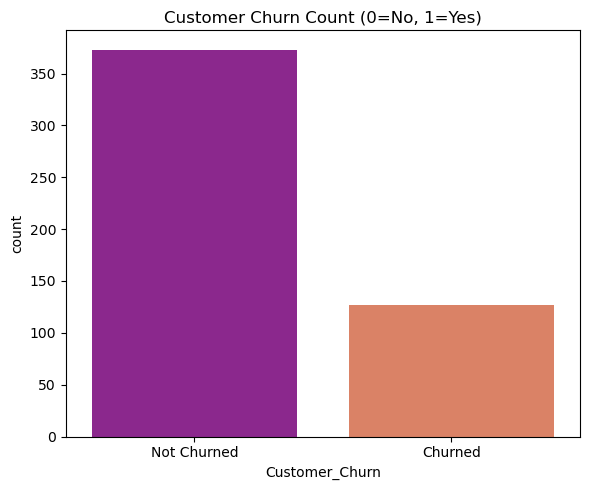

In [12]:
# Customer Count by Gender
plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', data=df_cleaned, palette='pastel', hue='Gender', legend=False)
plt.title('Customer Count by Gender')
plt.tight_layout()
plt.show()

# Purchases by Seasonality
plt.figure(figsize=(6, 5))
sns.countplot(x='Seasonality', data=df_cleaned, palette='viridis', hue='Seasonality', legend=False)
plt.title('Purchases by Seasonality')
plt.tight_layout()
plt.show()

# Customer Churn Count (0=No, 1=Yes)
plt.figure(figsize=(6, 5))
sns.countplot(x='Customer_Churn', data=df_cleaned, palette='plasma', hue='Customer_Churn', legend=False)
plt.title('Customer Churn Count (0=No, 1=Yes)')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.tight_layout()
plt.show()

#### Key Observations:
Gender: The number of male and female customers is nearly equal in the dataset.
Seasonality: Purchases are distributed across Low, Medium, and High seasonality, with Medium being the most frequent.
Customer Churn: A significant portion of customers have churned (left the service).
#### D. Sales by Seasonality and Churn Status

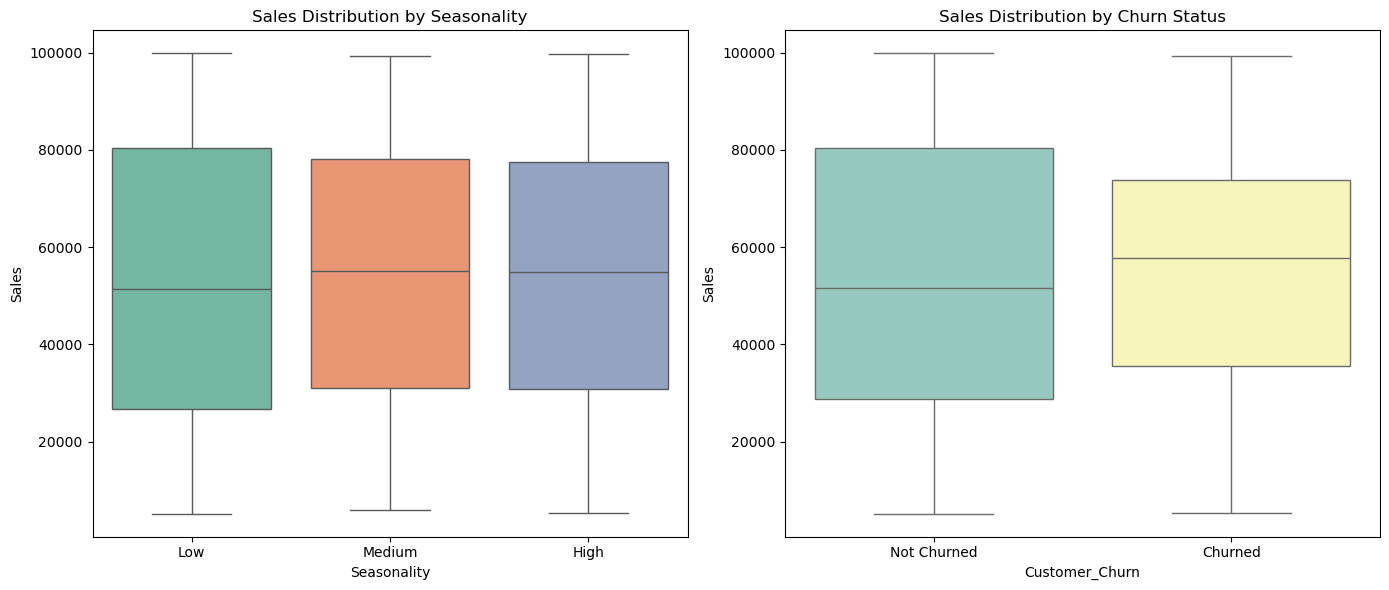

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Address FutureWarning by assigning x to hue for boxplot
sns.boxplot(x='Seasonality', y='Sales', data=df_cleaned, ax=axes[0], palette='Set2', hue='Seasonality', legend=False).set_title('Sales Distribution by Seasonality')
sns.boxplot(x='Customer_Churn', y='Sales', data=df_cleaned, ax=axes[1], palette='Set3', hue='Customer_Churn', legend=False).set_title('Sales Distribution by Churn Status')

# Address UserWarning by setting ticks before labels
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

#### Key Observations:
Sales by Seasonality: Median sales appear to be slightly higher during "High" seasonality, but the overall distributions are quite similar, suggesting seasonality may not be a very strong driver of sales volume on its own.
Sales by Churn Status: Interestingly, the median Sales for customers who churned is slightly lower than for those who did not. However, the churned group contains customers with very high sales, indicating that even high-value customers are at risk of churning.
#### 1.5 Basic Statistics Summary (Cleaned Dataset)
Finally, here is the new descriptive statistics summary for the cleaned dataset. The count for all columns is now 500, and there are no missing values. The means for Income, Credit_Score, and Loan_Amount remain the same because we used the mean for imputation.

In [14]:
# Get and print stats for the cleaned dataset
cleaned_shape, cleaned_summary = get_stats_summary(df_cleaned)

print("--- Cleaned Dataset Summary ---")
print(f"Shape: {cleaned_shape}\n")
display(cleaned_summary)

--- Cleaned Dataset Summary ---
Shape: 500 rows, 14 columns



,count,mean,median,std_dev,variance,range,iqr,mode
Customer_ID,500,250.50,250.5,144.48,2.087500e+04,499.0,249.50,1
Age,500,44.22,45.0,15.04,2.260800e+02,51.0,25.00,50.0
Income,450,84398.06,85375.5,40112.05,1.608977e+09,129867.0,74155.25,20055.0
Spending_Score,500,50.86,51.0,29.13,8.482700e+02,98.0,51.25,98.0
Credit_Score,450,573.41,588.5,157.40,2.477370e+04,548.0,255.50,383.0
Loan_Amount,450,28456.93,29817.0,12427.29,1.544377e+08,44773.0,21082.75,20379.0
Previous_Defaults,500,0.97,1.0,0.83,6.800000e-01,2.0,2.00,0.0
Marketing_Spend,500,10558.13,10754.0,5508.22,3.034048e+07,18966.0,9058.25,14324.0
Purchase_Frequency,500,15.35,16.0,8.48,7.183000e+01,28.0,15.00,27.0
Sales,500,54378.95,54032.5,27263.11,7.432770e+08,94632.0,48016.25,52574.0


In [15]:
# Export the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

### 2. Customer Analytics Dashboard

#### 2.0.1 Key Matrics

In [20]:
# Total customer
total_customers = df_cleaned.shape[0]
print(f"Total customers: {total_customers}")

# Total sales
total_sales = df_cleaned['Sales'].sum()
print(f"Total sales: {total_sales:.2f}")

# Default Rate
default_customers = df_cleaned[df_cleaned['Defaulted'] == 1].shape[0]
print(f"Default customers: {default_customers}")
default_rate = (df_cleaned['Defaulted'].sum() / total_customers) * 100
print(f"Default rate: {default_rate:.2f}%")

# Churned customers
churned_customers = df_cleaned[df_cleaned['Customer_Churn'] == 1].shape[0]
print(f"Churned customers: {churned_customers}")

# Churn rate
churn_rate = (churned_customers / total_customers) * 100
print(f"Churn rate: {churn_rate:.2f}%")

# Average sales per customer
average_sales_per_customer = total_sales / total_customers  
print(f"Average sales per customer: {average_sales_per_customer:.2f}")
# Average sales for churned customers
average_sales_churned = df_cleaned[df_cleaned['Customer_Churn'] == 1]['Sales'].mean()
print(f"Average sales for churned customers: {average_sales_churned:.2f}")

# Average sales for non-churned customers
average_sales_non_churned = df_cleaned[df_cleaned['Customer_Churn'] == 0]['Sales'].mean()
print(f"Average sales for non-churned customers: {average_sales_non_churned:.2f}")

#Compare average sales between churned and non-churned customers
if average_sales_churned > average_sales_non_churned:
    print("Churned customers have higher average sales.")   
else:
    print("Non-churned customers have higher average sales.")  
# Average sales by seasonality
average_sales_by_seasonality = df_cleaned.groupby('Seasonality')['Sales'].mean()
print("\nAverage sales by seasonality:")
print(average_sales_by_seasonality)

# Combine the metrics into a summary DataFrame
summary_metrics = pd.DataFrame({
    'Total Customers': [total_customers],
    'Total Sales': [total_sales],
    'Default Rate (%)': [default_rate],
    'Churn Rate (%)': [churn_rate],
    'Average Sales per Customer': [average_sales_per_customer],
    'Average Sales for Churned Customers': [average_sales_churned],
    'Average Sales for Non-Churned Customers': [average_sales_non_churned]
})
# Display the summary metrics
print("\n--- Summary Metrics ---")
display(summary_metrics)


Total customers: 500
Total sales: 27189477.00
Default customers: 95
Default rate: 19.00%
Churned customers: 127
Churn rate: 25.40%
Average sales per customer: 54378.95
Average sales for churned customers: 55615.66
Average sales for non-churned customers: 53957.88
Churned customers have higher average sales.

Average sales by seasonality:
Seasonality
High      55157.779762
Low       53286.294479
Medium    54658.603550
Name: Sales, dtype: float64

--- Summary Metrics ---


,Total Customers,Total Sales,Default Rate (%),Churn Rate (%),Average Sales per Customer,Average Sales for Churned Customers,Average Sales for Non-Churned Customers
0,500,27189477,19.0,25.4,54378.954,55615.661417,53957.876676


#### Key Insights: 2.1 Customer Behaviour and Risk Analysis


--- Churn vs Default Risk Matrix ---


Defaulted,0,1,Total
Customer_Churn,,,
0,61.4,13.2,74.6
1,19.6,5.8,25.4
Total,81.0,19.0,100.0


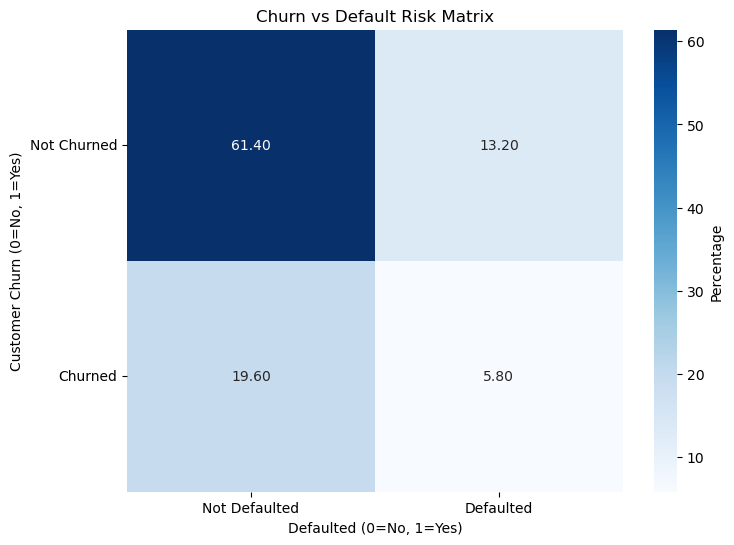

In [17]:
# Function to calculate Churn vs Default Risk Matrix
def churn_vs_default_risk_matrix(df):
    # Create a contingency table
    contingency_table = pd.crosstab(df['Customer_Churn'], df['Defaulted'], margins=True, margins_name="Total")
    
    # Calculate percentages
    contingency_table_percentage = contingency_table.div(contingency_table.loc['Total', 'Total'], axis=1) * 100
    
    return contingency_table_percentage

# Calculate and display the Churn vs Default Risk Matrix
churn_default_matrix = churn_vs_default_risk_matrix(df_cleaned)

print("\n--- Churn vs Default Risk Matrix ---")
display(churn_default_matrix)


# Visualization of Churn vs Default Risk Matrix
def plot_churn_default_matrix(matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix.iloc[:-1, :-1], annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Percentage'})
    plt.title('Churn vs Default Risk Matrix')
    plt.xlabel('Defaulted (0=No, 1=Yes)')
    plt.ylabel('Customer Churn (0=No, 1=Yes)')
    plt.xticks(ticks=[0.5, 1.5], labels=['Not Defaulted', 'Defaulted'], rotation=0)
    plt.yticks(ticks=[0.5, 1.5], labels=['Not Churned', 'Churned'], rotation=0)
    plt.show()
plot_churn_default_matrix(churn_default_matrix)


# Function to calculate Customer Lifetime Value (CLV)